## DS3000 Final Project
### Staying Warm in Unpredictable Fall Weather
Team 5, DS 3000

Names: Talal Fakhoury, Zehao Wang, Nanak Sabharwal


# Phase 1

### Introduction

What will the weather be like in the next weeks of fall? How about the next month of this year? It is important to stay warm when the season is changing, especially as the recent weather in Boston has become increasingly unpredictable due to climate changes. We are interested in examining the pattern of local weather for the last month to draw conclusions on the near future, based on features like feels-like temperatures and weather conditions. Our two key questions are as follows: 1. Using previous data, can we predict the expected weather patterns for the future? 2. Also using previous data, what are the actual temperatures going to be?

The goal of the questions is to help us stay informed when making predictive decisions earlier on what to wear based on the temperature and weather patterns.

### Data Collection

We use Weather Query Builder from VisualCrossing to collect data on the weather from the last year near Northeastern University. The weather data allows us to find information relevant to our questions of interest, namely the temperature, temperature ranges, and weather conditions. VisualCrossing is an easy web scraping website of the weather data based on the location we want to investigate on, which is Northeastern University. Due to API limitations with VisualCrossing, we decided to be cautious and pull four different smaller queries instead of sending one large query.

### Data Usage
The below data set has mostly been cleaned already. We have max and min temperature that may be useful in answering our second question, and weather conditions for the first. We use classification (predicting a categorical feature, like weather conditions) and can use regression (predicting numeric features like temperatures next month based on the pattern).

**Note:** the below code requires an API key, which we redacted. If you need to run the code yourself, you should create your own free VisualCrossing account and get your own API key. We gave this Jupyter Notebook a fresh Restart & Run All and the below outputs should serve as proof that we have access to the data.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Get the data from the website
# Did not include my own api key
url = f'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/360%20Huntington%20Ave%2C%20Boston%2C%20MA%2002115/2023-10-23/2024-10-23?unitGroup=metric&elements=datetime%2Ctempmax%2Ctempmin%2Ctemp%2Cdew%2Chumidity%2Ccloudcover%2Cconditions&include=days&key={key}&contentType=json'
response = requests.get(url)
data = response.json()

In [5]:
weather_data = data['days']
df = pd.DataFrame(weather_data)
df

,datetime,tempmax,tempmin,temp,dew,humidity,cloudcover,conditions
0,2023-10-23,16.6,8.3,11.7,5.2,64.8,71.3,Partially cloudy
1,2023-10-24,15.9,6.4,11.2,6.0,70.9,48.0,Partially cloudy
2,2023-10-25,24.3,11.3,16.7,10.1,67.9,50.0,Partially cloudy
3,2023-10-26,26.3,15.2,19.4,11.0,60.4,65.2,Partially cloudy
4,2023-10-27,25.6,16.4,20.0,12.1,61.6,59.2,Partially cloudy
...,...,...,...,...,...,...,...,...
362,2024-10-19,19.8,5.0,12.4,4.9,62.8,8.2,Clear
363,2024-10-20,25.0,7.5,15.3,1.8,46.2,22.7,Partially cloudy
364,2024-10-21,28.0,11.2,19.3,6.8,45.8,27.6,Partially cloudy
365,2024-10-22,22.0,12.9,16.7,11.0,70.4,19.2,Clear


# Phase 2

In [56]:
# Save the DataFrame as 'weather_data.csv' for future use due to api limit
df.to_csv('weather_data.csv', index=False)

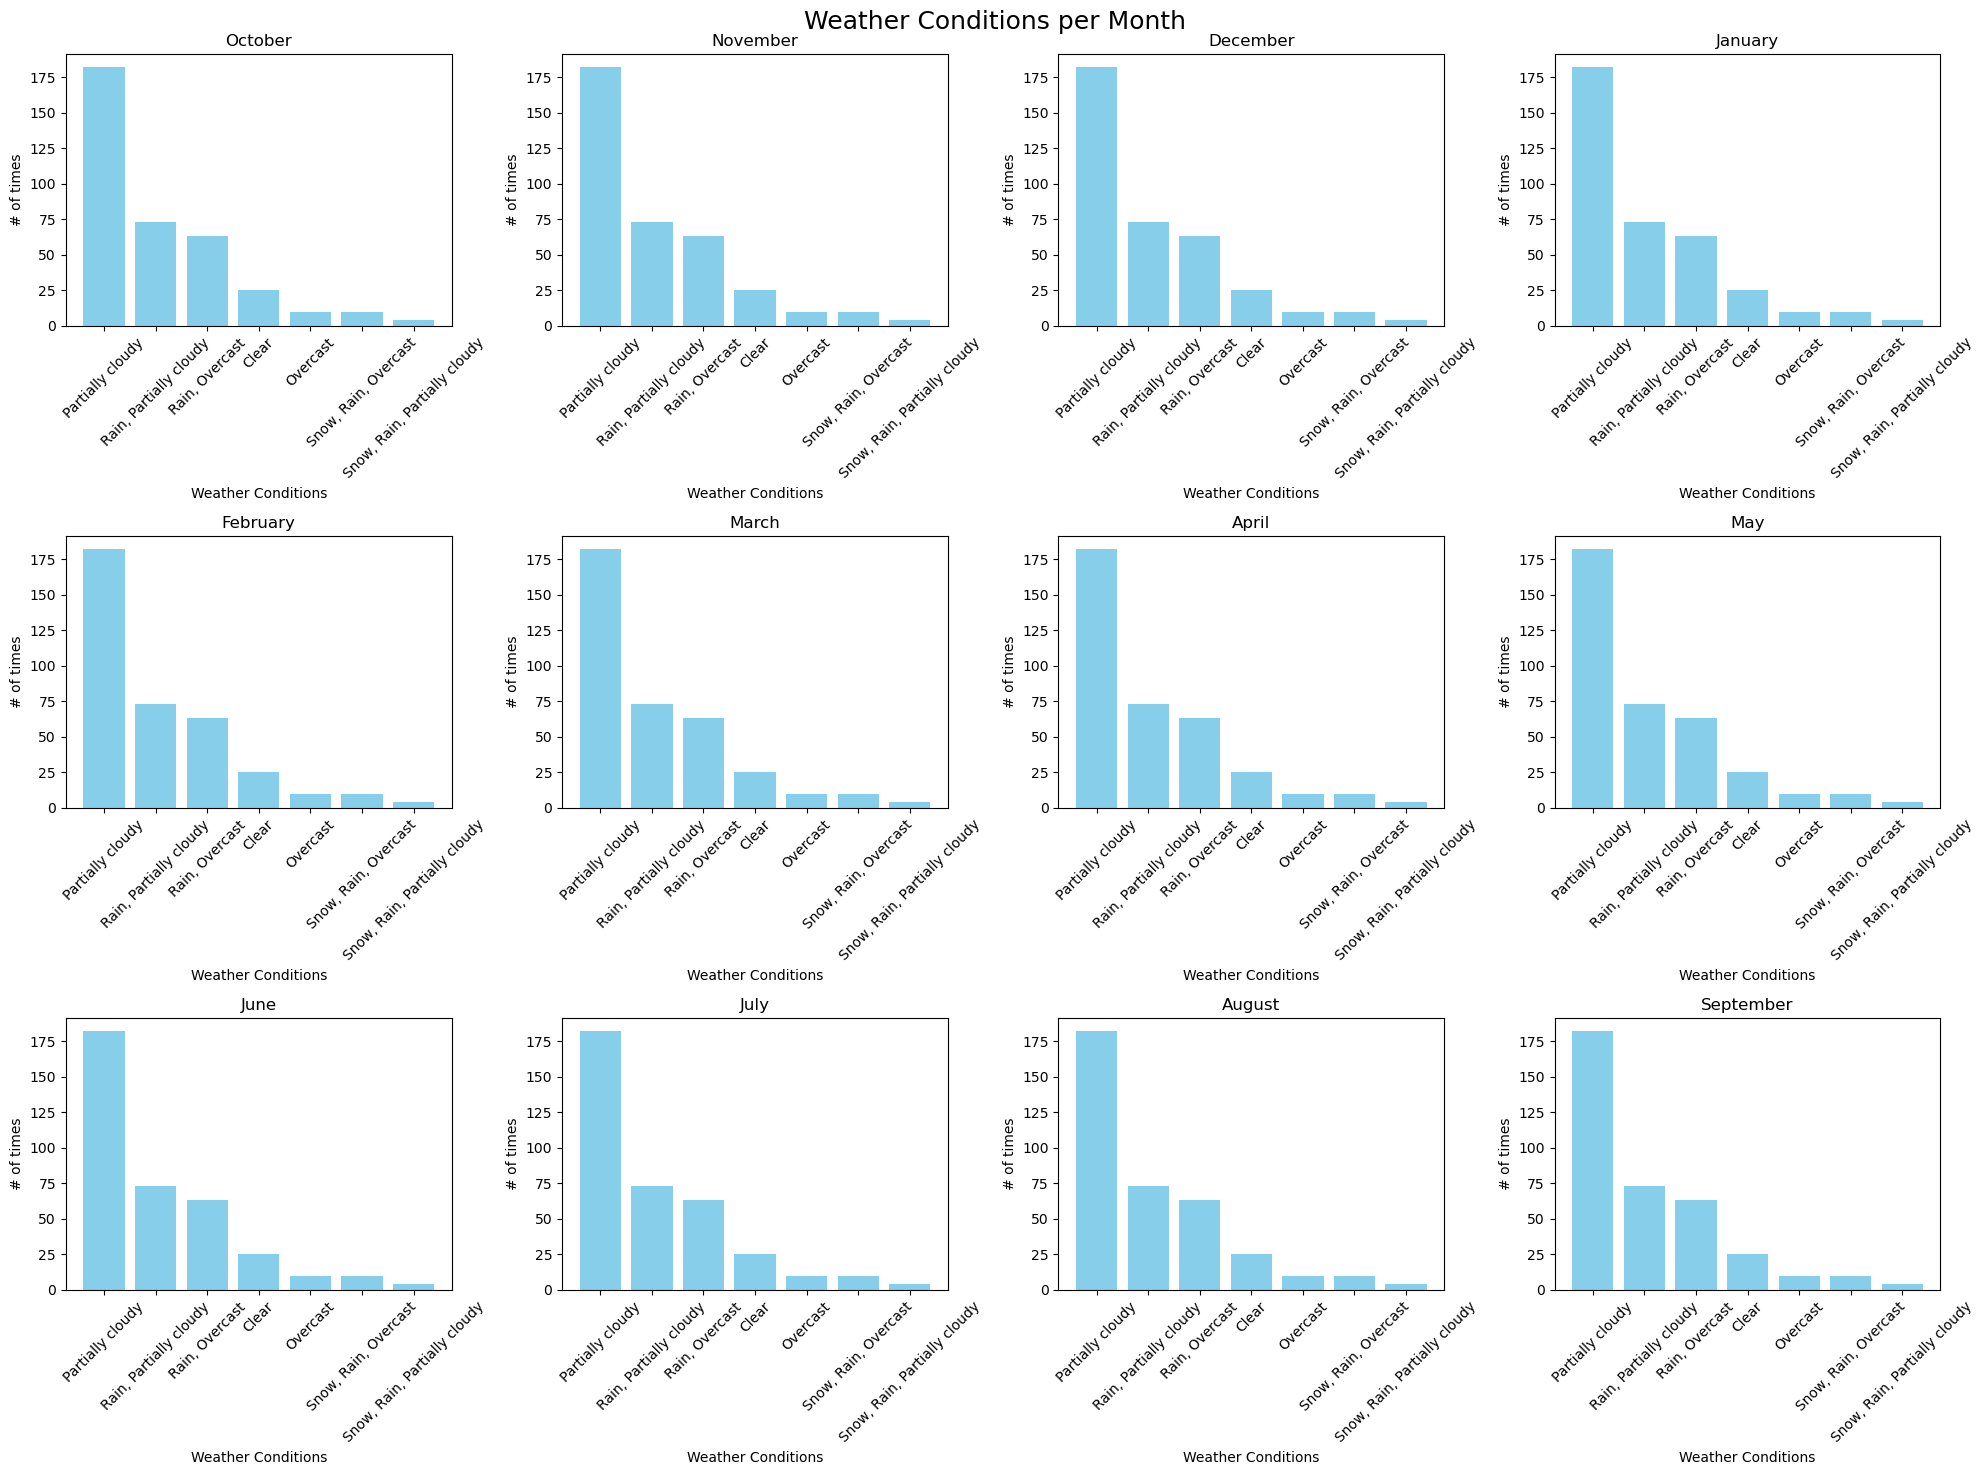

In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])

# subplots grid created
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Weather Conditions per Month', fontsize=18)

# titles
months = ["October", "November", "December", "January", "February", "March", "April", "May", "June", "July", "August", "September"]

# looping to make one plot per month
for i, this_month in enumerate(months):

    # counts for each month
    month = i + 10 if i < 3 else i - 2
    month_conditions = df[df['datetime'].dt.month == month]
    condition_counts = df['conditions'].value_counts()

    # plotting into the right subplot
    row = i // 4
    col = i % 4
    axes[row, col].bar(condition_counts.index, condition_counts.values, color='skyblue')
    axes[row, col].set_title(this_month)
    axes[row, col].set_xlabel('Weather Conditions')
    axes[row, col].set_ylabel('# of times')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

To answer our first question, we can see that about 2/3 of all of the Fall days are partially cloudy, and we won't have to worry about covering up from the sun too much. A fifth of the days are rainy, which are the days that require wearing the most. Across the Winter months, we can see the few snow days, and expect to not have many more, while the partially cloudy days are fewer and the rainy days are more. Thus, we can observe trends of frequencies within and across the seasons (mostly partly cloudy days in November, more rainy days in Spring), and further analysis can likely be run on this now that there are numbers to the categories.

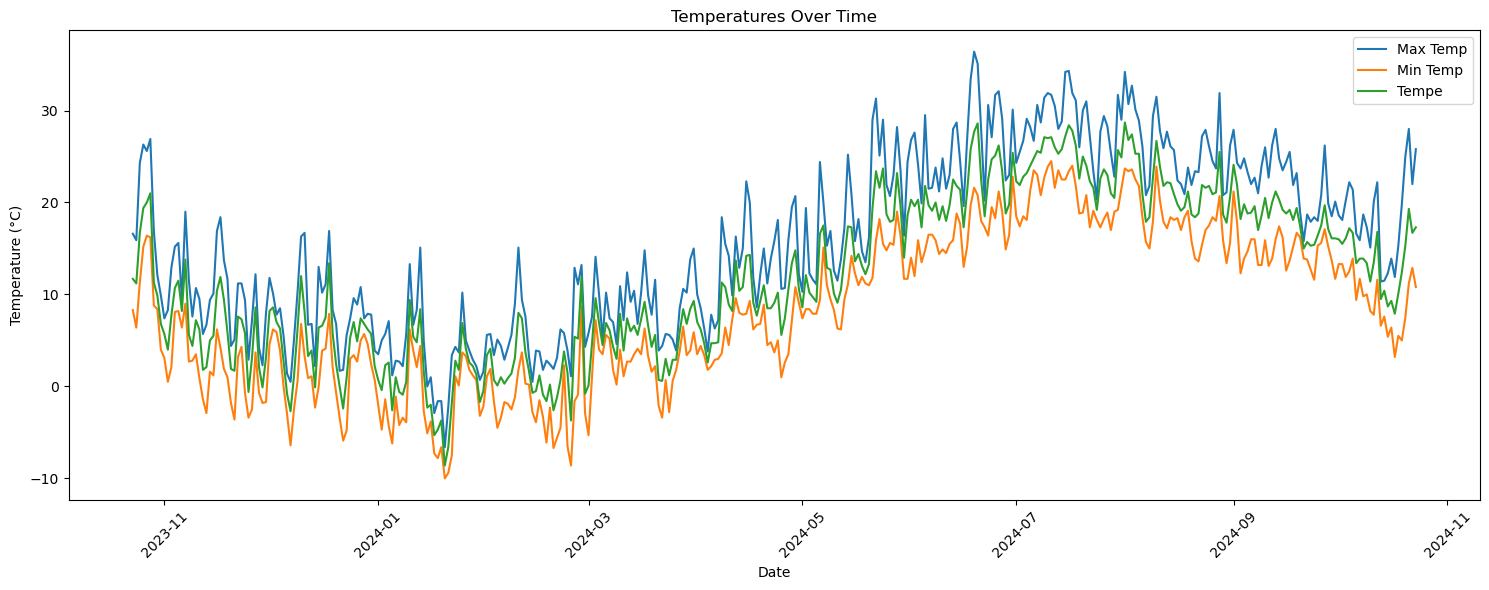

In [9]:
# Create a line plot of temperature over time
plt.figure(figsize = (15, 6))
plt.plot(df['datetime'], df['tempmax'], label = 'Max Temp')
plt.plot(df['datetime'], df['tempmin'], label = 'Min Temp')
plt.plot(df['datetime'], df['temp'], label = 'Tempe')

# Add Labels
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperatures Over Time')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The temperature lines show a pretty self-evident truth: winter months are the coldest, and that the summer months are warmest, generally. However, the maximum and minimum temperature lines are very telling as to the variance of the temperatures, with the warmest winter temperatures reaching the coldest of summer night temperatures. While it can be assumed that the next year's worth of data would follow this curve trend again, the next step would be to predict the next year, or at least the next season's temperatures, and run some statistical analyses on them to specifically determine values to describe the trends.

# Phase 3

### First ML Model

In [23]:
import numpy as np

# Extract features (X) and target (y)
X = df['dew'].values.reshape(-1, 1)
y = df['temp'].values

In [25]:
def add_bias_column(X):
    """
    Args:
        X (array): can be either 1-d or 2-d
    
    Returns:
        Xnew (array): the same array, but 2-d with a column of 1's in the first spot
    """
    
    # If the array is 1-d
    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])
    
    # If the array is 2-d
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])
        
    else:
        raise ValueError("Input array must be either 1-d or 2-d")

    return Xnew

In [27]:
def line_of_best_fit(X, y):
    """
    Compute the coefficients for the line of best fit
    
    Args:
        X (array): can be either 1-d or 2-d array (all the predictor values)
        y (array): a 1-d array (all corresponding response values to X)
    
    Returns:
        m (array): a 1-d array contains coefficients (intercept term as the first coefficient)
    """

    # Add bias to X (with a column of 1's in the first spot)
    adjust_X = add_bias_column(X)

    # Compute the coefficients for the line of best fit
    XtXinv = np.linalg.inv(np.matmul(adjust_X.T, adjust_X))
    m = np.matmul(XtXinv, np.matmul(adjust_X.T, y))

    return m

In [29]:
import seaborn as sns
sns.set()

def get_mse(y_true, y_pred):
    """
    Compute the mean squared error
    
    Args:
        y_true (array): a 1-d array of true values
        y_pred (array): a 1-d array of predicted values
    
    Returns:
        mse (float): mean squared error
    """
    # Calculate the mean squared distance between the predicted and actual y
    mse = np.mean((y_true - y_pred) ** 2)
    
    return mse

def show_fit(X, y, slope, intercept):
    """
    Create a plot of line of best fit
    
    Args:
        X (array): a 1-d array of true values
        y (array): a 1-d array of predicted values
        slope (float): slope of line of best fit
        intercept (float): intercept of line of best fit
    
    Returns:
        Nothing
    """
    plt.figure()
    
    # in case this wasn't done before, transform the input data into numpy arrays and flatten them
    x = np.array(X).ravel()
    y = np.array(y).ravel()
    
    # plot the actual data
    plt.scatter(x, y, label='data')
    
    # compute linear predictions 
    # x is a numpy array so each element gets multiplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='linear fit')
    
    plt.legend()
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    # print the mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true = y, y_pred = y_pred)
    plt.suptitle(f'y_hat = {slope:.3f} * x + {intercept:.3f}, MSE = {mse:.3f}')

def r_squared(y_true, y_pred):
    """
    Calculate R-squared
    
    Args:
        y_true (array): a 1-d array of true values
        y_pred (array): a 1-d array of predicted values
    
    Returns:
        r_sq: R-squared of the model
    """
    total = np.sum((y_true - np.mean(y)) ** 2)
    residual = np.sum((y_true - y_pred) ** 2)
    r_sq = 1 - (residual / total)
    
    return r_sq

def residuals(y_true, y_pred):
    """
    Compute residuals between true and predicted values

    Args:
        y_true (array): a 1-d array of true values
        y_pred (array): a 1-d array of predicted values
    
    Returns:
        res (array): a 1-d array of residuals
    """
    # Ensure inputs are arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate residuals
    res = y_true - y_pred
    
    return res

In [31]:
def standardize(X):
    """
    Standardize features to a mean of 0 and a standard deviation of 1
    
    Args:
        X (array): can be either 1-d or 2-d array (all the predictor values)
    
    Returns:
        X_std (array): either 1-d or 2-d array of standardized version of X
    """
    mean = np.mean(X)
    std = np.std(X)
    X_stand = (X - mean) / std
    return X_stand

In [33]:
# Standardize features
X_std = standardize(X)

# Compute the line of best fit using standardized features
coeff = line_of_best_fit(X_std, y)
intercept, slope = coeff[0], coeff[1]
print(f'The intercept is {intercept}. The slope is {slope}.')

The intercept is 11.94495912806539. The slope is 8.089835521043907.


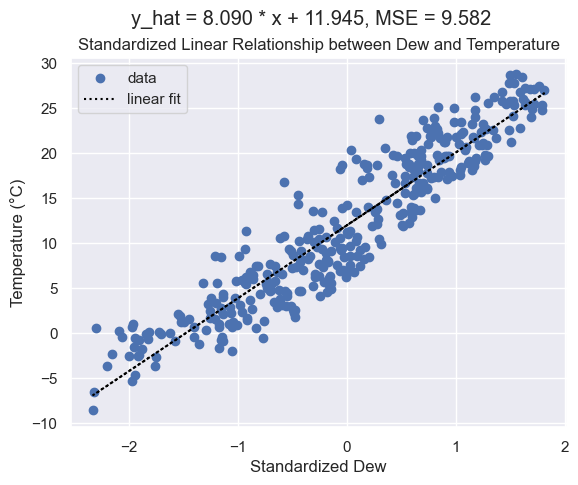

In [35]:
# Plot the full line of best fit using standardized features
show_fit(X_std, y, slope, intercept)
plt.xlabel('Standardized Dew')
plt.ylabel('Temperature (°C)')
plt.title('Standardized Linear Relationship between Dew and Temperature')
plt.show()

In [50]:
# Compute the R-sqaured
y_pred = add_bias_column(X_std) @ coeff
r2 = r_squared(y, y_pred)
print(f'The R-squared of the first ML model is {r2}.')

The R-squared of the first ML model is 0.8722817138795461.


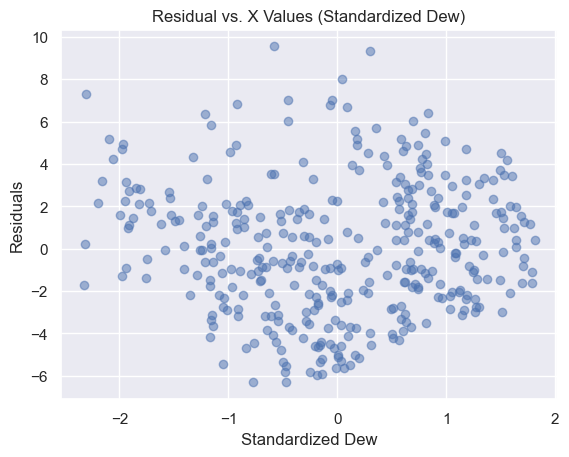

In [41]:
# Compute the residuals 
dew_res = residuals(y, y_pred)

# Create a plot of x values versus residuals
plt.scatter(X_std, dew_res, alpha = 0.5)
plt.xlabel('Standardized Dew')
plt.ylabel('Residuals')
plt.title('Residual vs. X Values (Standardized Dew)')
plt.show()

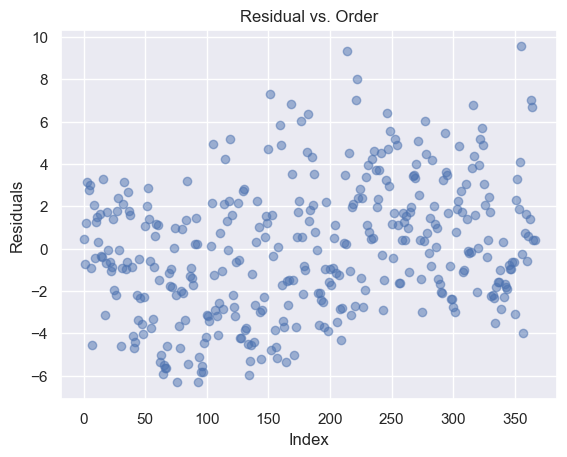

In [43]:
# Create a plot of residuals versus order
plt.scatter(range(len(X_std)), dew_res, alpha = 0.5)
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residual vs. Order')
plt.show()

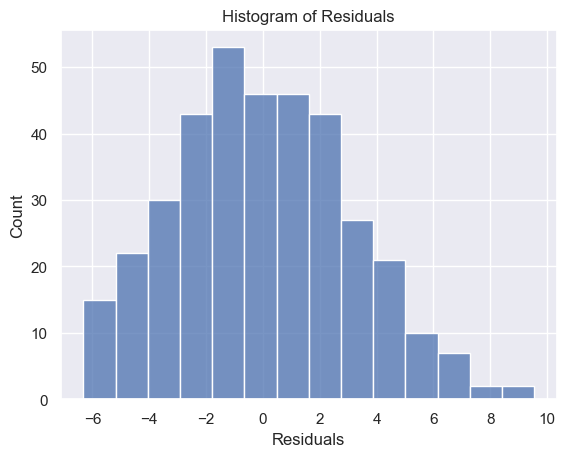

In [45]:
# Create a histogram of residuals
sns.histplot(dew_res, kde = False)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

### A discussion of the preliminary results for the first ML model

To address the question of predicting temperature based on weather patterns, we implemented a simple linear regression model to examine the relationship between standardized dew and temperature. Using NumPy, we calculated the line of best fit, resulting in the equation:  y^=8.090x +11.945
 
Here, the slope of 8.090 suggests a slight positive relationship between dew and temperature, meaning higher dew is associated with a marginal increase in temperature. The R^2 value of 0.873 indicates that 87.3% of the variability in temperature is explained by dew. This shows that the model fits the data well, suggesting dew is a good predictor of temperature. The mean squared error (MSE) of 9.582 further highlights the model's predictive accuracy and reinforces dew point as a reliable predictor of temperature.

The first plot 'Residual vs. X Values (Standardized Dew)' demonstrates that residuals are randomly distributed around zero with no clear pattern between the X feature (Standardized Dew) and residuals, which suggests that the model satisfies the linearity assumption. The second plot 'Residual vs. Order' also has no clear trend in residuals against the order, suggesting that the model satisfies the assumption of no autocorrelation, indicating that the residuals are independent. The third plot 'Histogram of Residuals' shows a slightly right skewed histogram, which suggests a potential deviation from the normality assumption.

As a result, dew appears to be a strong predictor of temperature, with the model demonstrating a high R^2 value and an acceptable mean squared error. However, the slightly right-skewed histogram of residuals suggests that we may want to use a different model or explore the combination of other features. 

### Second ML Model

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [72]:
def linreg_predict(Xnew, ynew, m):
    """
    Predict the predicted values, residuals, mean squared error, and r2
    
    Args:
        Xnew (array): can be either 1-d or 2-d array (all the predictor values)
        ynew (array): a 1-d array (all corresponding response values to Xnew)
        m (array): a 1-d array contains coefficients (intercept term as the first coefficient)
    
    Returns:
        result (dict): a dictionary with ypred (the predicted values), residuals, mean squared error, and r2
    """

    # Add bias to Xnew (with a column of 1's in the first spot)
    adjust_Xnew = add_bias_column(Xnew)

    # Compute a 1-d array of predicted values
    ypreds = np.matmul(adjust_Xnew, m)

    # Compute a 1-d array of residuals
    res = ynew - ypreds

    # Compute the mean squared error of the predictions
    MSE = (res ** 2).mean()

    # Compute the coefficient of determination (R^2)
    r2 = r2_score(ynew, ypreds)

    # Return results in a dictionary
    result = {'ypreds': ypreds, 'resids': res, 'mse': MSE, 'r2': r2}

    return result

In [64]:
x_feat_list = ['dew', 'humidity', 'cloudcover']
y = df['temp']

# Scale the X features using standardization
X = df[x_feat_list].values
for i in range (3):
    X[:, i] = (X[:, i] - X[:, i].mean()) / X[:, i].std()

In [76]:
# Use single-fold cross validation
weather_crossval = train_test_split(X, 
                                 y,
                                 test_size = 0.3,
                                 random_state = 3)
Xtrain, Xtest, ytrain, ytest = weather_crossval

# Compute the coefficients for the line of best fit
weather_m = line_of_best_fit(Xtrain, ytrain)

# Predict the predicted values, residuals, mean squared error, and r2
weather_result = linreg_predict(Xtest, ytest, weather_m)

# Print the result
print(f'MSE: {weather_result['mse']}')
print(f'R^2: {weather_result['r2']}')

MSE: 0.36314901266500055
R^2: 0.995037765535549


In [78]:
# Extract the coefficients and intercept
intercept = weather_m[0]
coefficients = weather_m[1:]

# Build the equation
terms = [f'{coefficients[i]:.3f} * {x_feat_list[i]}' for i in range(len(x_feat_list))]
equation = f'y = {intercept:.3f} + ' + ' + '.join(terms)

# Print the regression equation
print("The regression equation is:")
print(equation)

The regression equation is:
y = 11.930 + 9.727 * dew + -3.382 * humidity + -0.045 * cloudcover


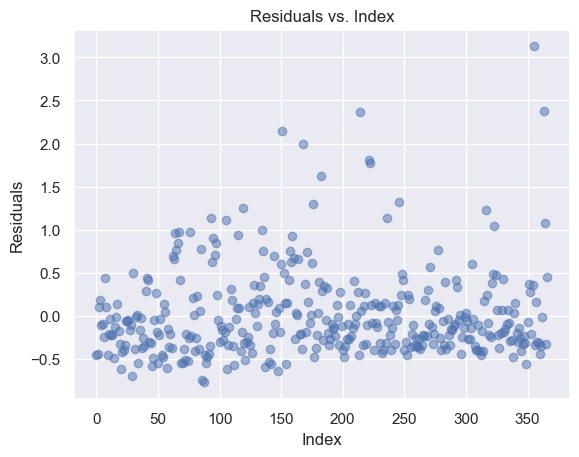

In [82]:
# Use the linear regression prediction to get residual
weather_pred = linreg_predict(X, y, weather_m)
weather_res = weather_pred['resids']

# Create a plot of residuals versus order
plt.scatter(range(len(X)), weather_res, alpha = 0.5)
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals vs. Index')
plt.show()

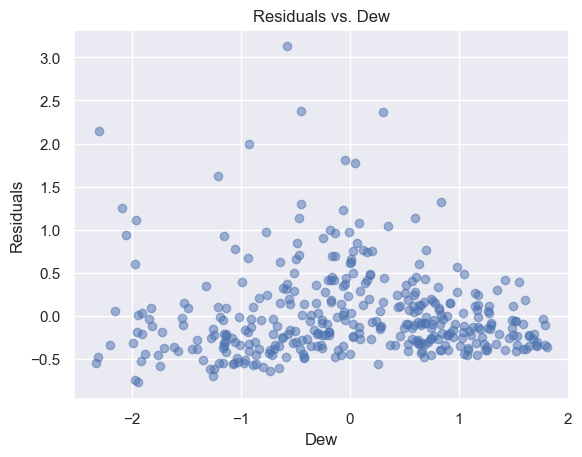

In [84]:
# Create a plot of residuals versus dew
plt.scatter(X[:, 0], weather_res, alpha = 0.5)
plt.xlabel('Dew')
plt.ylabel('Residuals')
plt.title('Residuals vs. Dew')
plt.show()

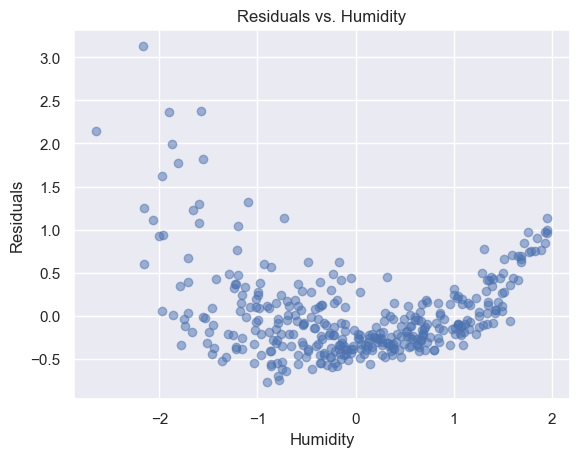

In [86]:
# Create a plot of residuals versus humidity
plt.scatter(X[:, 1], weather_res, alpha = 0.5)
plt.xlabel('Humidity')
plt.ylabel('Residuals')
plt.title('Residuals vs. Humidity')
plt.show()

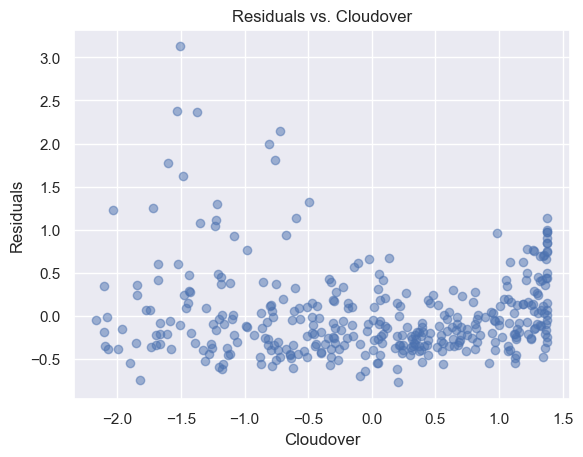

In [88]:
# Create a plot of residuals versus humidity
plt.scatter(X[:, 2], weather_res, alpha = 0.5)
plt.xlabel('Cloudover')
plt.ylabel('Residuals')
plt.title('Residuals vs. Cloudover')
plt.show()

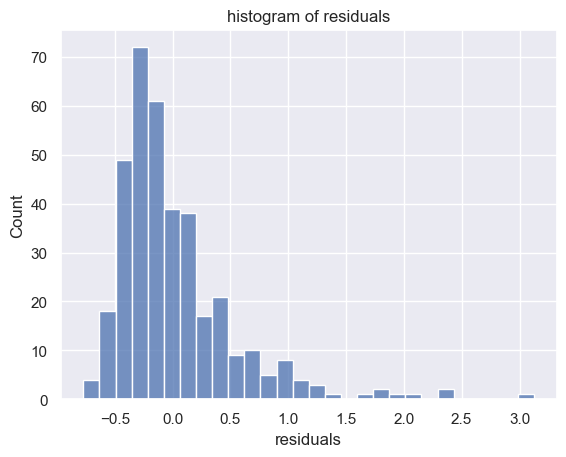

In [90]:
# Create a plot of histogram of residuals
sns.histplot(weather_res, kde = False)
plt.xlabel('residuals')
plt.title('histogram of residuals')
plt.show()